# Errors in numerical differentiation

### Example:

Find the derivative of:

$y(x) = \sin(x)$


We know that:

$y'(x) = \cos(x)$

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# define function
def sin_function(x):
    return np.sin(x)

In [3]:
# step size
h = 0.1

In [4]:
# define grid
x = np.arange(-2*np.pi, 2*np.pi, h) 

In [9]:
print(x.shape)

(126,)


In [7]:
y = sin_function(x)

In [8]:
# compute vector of forward differences
forward_diff = (sin_function(x + h) - sin_function(x))/(h)

In [10]:
print(forward_diff.shape)

(126,)


In [11]:
exact_solution = np.cos(x)

### Plotting:

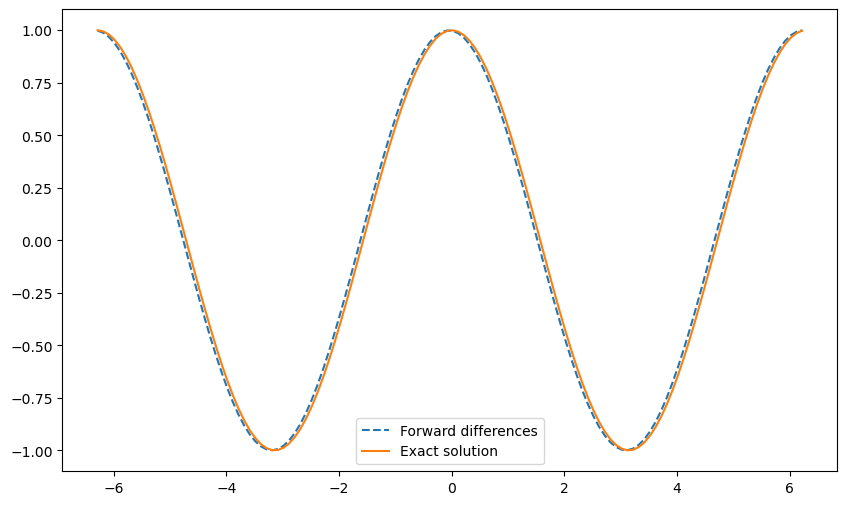

In [14]:
# Figure environment:

plt.figure(figsize = (10, 6))
plt.plot(x, forward_diff, '--', label = 'Forward differences')
plt.plot(x, exact_solution, label = 'Exact solution')
plt.legend()
plt.show()

### Maximum error

In [15]:
# Compute max error between numerical derivative and exact solution

max_error = np.max(np.abs(exact_solution - forward_diff))
print(max_error)

0.04997545591097786


### Iterative error calculation

In [32]:
# define step size
h = 1

# define # f iterations
iterations = 10

#Empty lists for step size and max error
step_size = []
max_error1 = []
max_error2 = []

# for loop
for i in range(iterations):
    # calculate h/2 recursively
    h /= 2
    
    # store step size
    step_size.append(h)
    
    # x -vector 
    x = np.arange(-2*np.pi, 2*np.pi, h)
    
    # y-vector
    y = sin_function(x)
    
    # compute vector of forward and central differences
    forward_diff = (sin_function(x + h) - sin_function(x))/(h)
    central_diff = (sin_function(x + h/2) - sin_function(x - h/2))/(h)
    
    # compute exact solution
    exact_solution = np.cos(x) 
    
    #compute max error
    max_error1.append(np.max(np.abs(exact_solution - forward_diff)))
    max_error2.append(np.max(np.abs(exact_solution - central_diff)))

In [33]:
print(step_size)

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]


In [34]:
print(max_error2)

[0.010384162981908363, 0.002602132918178457, 0.000650914521916679, 0.00016275246956554135, 4.0689607464061694e-05, 1.0172494997573445e-05, 2.5431295702649237e-06, 6.357827563308049e-07, 1.5894571181451767e-07, 3.973642936916377e-08]


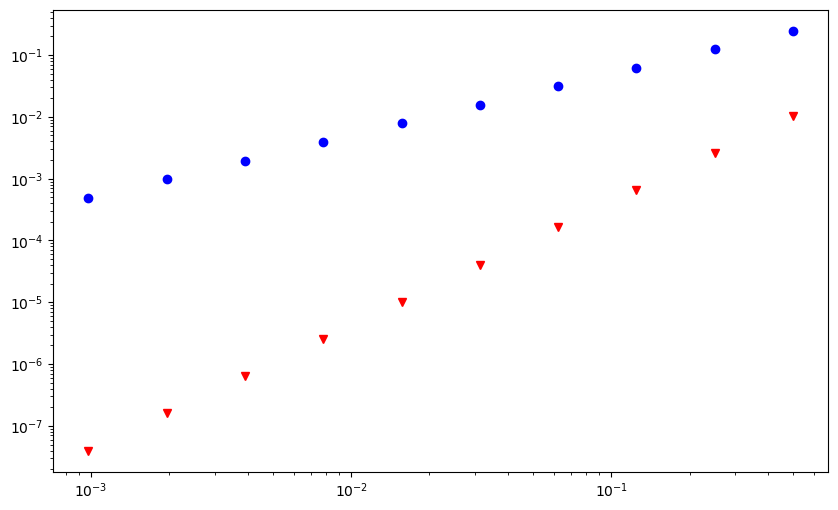

In [36]:
plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')

plt.show()

## Fits to the log-log plot:

In [37]:
# Get coefficients

a1, b1 = np.polyfit(np.log10(step_size), np.log10(max_error1), 1)

a2, b2 = np.polyfit(np.log10(step_size), np.log10(max_error2), 1)

In [38]:
# Print to check
print('slope1 =', a1, ' intercept1 =', b1)
print('slope2 =', a2, ' intercept2 =', b2)

slope1 = 0.9992185770815306  intercept1 = -0.30279423818019946
slope2 = 1.9996963829682863  intercept2 = -1.3808948964248593


In [39]:
# Get fitting function
fit_max_error1 = a1*np.log10(step_size) + b1
fit_max_error2 = a2*np.log10(step_size) + b2

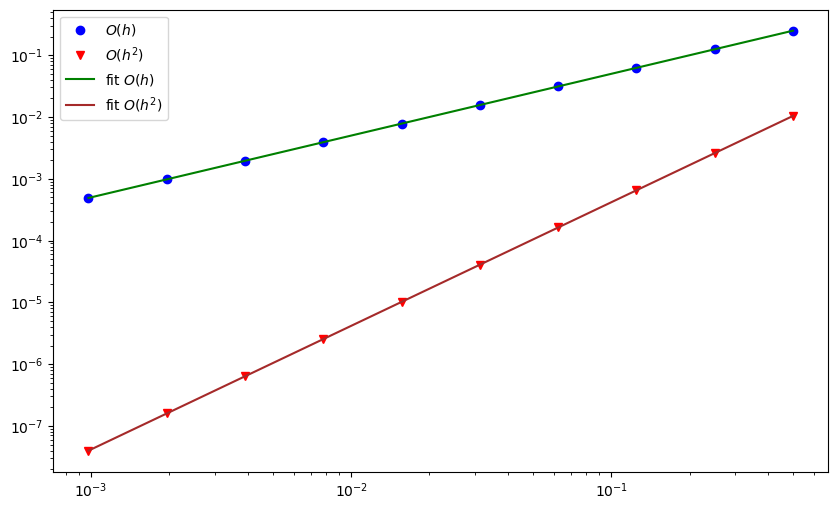

In [44]:
plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.loglog(step_size, 10**fit_max_error1, linestyle = '-', c = 'green', label = r'fit $O(h)$')
plt.loglog(step_size, 10**fit_max_error2, linestyle = '-', c = 'brown', label = r'fit $O(h^2)$')
plt.legend()
plt.show()